In [235]:
import numpy as np

def resize_axis(array, N):
    if(array.shape[1] > N):
        resized = array[:,:N]
    else:
        resized = np.lib.pad(array, ((0,0),(0,N - array.shape[1])),\
            'constant', constant_values=(np.min(array)))
    return resized
        

In [ ]:
DEFAULT_SR = 22050

[-5.4911841e-03 -4.9274914e-02 -1.0973954e-01 ... -8.8382731e-05
 -1.7606540e-04 -1.9179628e-04]
(1025, 8)


/Users/cooky/miniforge3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


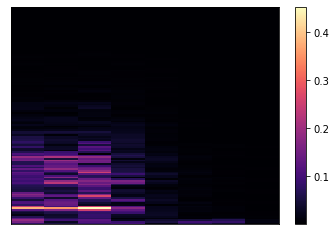

In [243]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

# from past.utils import old_div

#y, sr = librosa.load("D:\Drum\HiHat\hat 2 SMOKE.wav")
#y, sr = librosa.load("D:\Drum\HiHat\!Hat 39.wav")
y, sr = librosa.load('/Users/cooky/HDD/Drum/Dilla Drums/!Snare 180.wav')
#y, sr = librosa.load('/Users/cooky/HDD/Drum/illmind blap kit 7/KICK_FUELO.wav')

#print(y.shape)

yt, index = librosa.effects.trim(y=y, top_db=30)



yt = librosa.util.normalize(yt)

print(yt)

D = librosa.stft(yt)  # STFT of y

# print(D.shape)

mel = librosa.feature.melspectrogram(
        S=D, sr=DEFAULT_SR,
        hop_length=1024, n_mels=128)


S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

#resized_S_db = resize_axis(S_db)

print(S_db.shape)

plt.figure()
librosa.display.specshow(mel)
plt.colorbar()

In [197]:
S_db.shape

(1025, 23)

In [155]:
def trim(raw_audio, sr):
    '''
    Finds the first onset of the sound, returns a good start time and end time that isolates the sound
    :param raw_audio: np array of audio data, from librosa.load
    :param sr: sample rate
    :return: dict with 'start' and 'end', in seconds
    '''
    start = 0.0
    end = None

    # Add an empty second so that the beginning onset is recognized
    silence_to_add = 1.0
    raw_audio = np.append(np.zeros(int(silence_to_add * sr)), raw_audio)

    # Spectral flux
    hop_length = int(librosa.time_to_samples(1. / 200, sr=sr))
    onsets = librosa.onset.onset_detect(y=raw_audio, sr=sr, hop_length=hop_length, units='time')

    if len(onsets) == 0:
        return {'start': start, 'end': end}
    elif len(onsets) > 1:
        # If there are multiple onsets, cut it off just before the second one
        end = onsets[1] - (silence_to_add + 0.01)

    start = max(onsets[0] - (silence_to_add + 0.01), 0.0)
    return {'start': start, 'end': end}

In [156]:
trim(y, sr)

{'start': 0.01267573696145119, 'end': None}

In [157]:
CNN_INPUT_SIZE = (128, 256)
DEFAULT_SR = 22050

In [233]:
def extract_cnn_input(raw_audio):
    frame_length = min(2048, len(raw_audio))
    print('rawaudio', frame_length)
    mel_spec = librosa.core.power_to_db(librosa.feature.melspectrogram(
        y=raw_audio, sr=DEFAULT_SR, n_fft=frame_length,
        hop_length=frame_length//4, n_mels=CNN_INPUT_SIZE[0])
    )
    # Truncate number of frames stored
    m = min(CNN_INPUT_SIZE[1], mel_spec.shape[1])
    return mel_spec[:, 0:m]

In [206]:
1025//5

205

In [198]:
a = extract_cnn_input(S_db)

rawaudio 1025


/Users/cooky/miniforge3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1025 is too small for input signal of length=23
  return f(*args, **kwargs)


In [160]:
a.shape

(1025, 128, 1)

In [161]:
def init_based(a,N):
    b = np.zeros((a.shape[0], N))
    b[:, :a.shape[1]] = a
    return b

In [162]:
N = 20
aa = np.lib.pad(S_db, ((0,0),(0,N)), 'constant', constant_values=(-80))

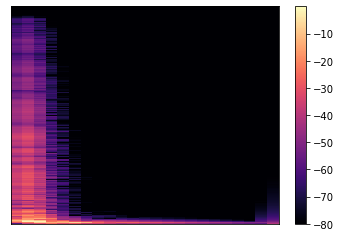

In [163]:
#D = librosa.stft(a)  # STFT of y
#S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [164]:
aa.shape

(1025, 43)

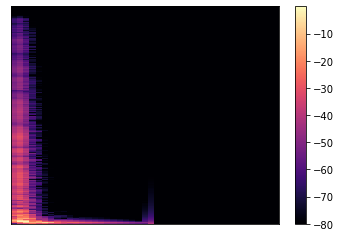

In [207]:
plt.figure()
librosa.display.specshow(aa)
plt.colorbar()

In [166]:
import torch
from torch import nn
import torch.nn.functional as F

In [37]:
DATASET_MEAN = -22.72945807
DATASET_STD = 13.65106709

In [250]:
def extract_cnn_input(raw_audio):
    frame_length = min(2048, len(raw_audio))
    mel_spec = librosa.core.power_to_db(librosa.feature.melspectrogram(
        y=raw_audio, sr=DEFAULT_SR, n_fft=frame_length,
        hop_length=frame_length//4, n_mels=CNN_INPUT_SIZE[0])
    )
    # Truncate number of frames stored
    m = min(CNN_INPUT_SIZE[1], mel_spec.shape[1])
    print(mel_spec.shape[1])
    N =20
    mell = resize_axis(mel_spec[:, 0:m], N)
    return mell

In [251]:
k = extract_cnn_input(y)
kk = extract_cnn_input(yt)
#kkk = extract_cnn_input(S_db)

13
8


In [252]:
CNN_INPUT_SIZE[1]

256

In [253]:
k.shape

(128, 20)

In [254]:
kk.shape

(128, 20)

In [255]:
kkk.shape

(1025, 128, 1)

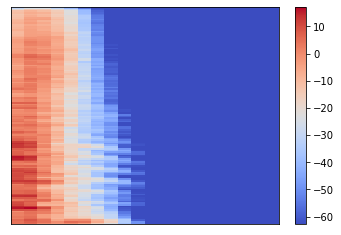

In [256]:
plt.figure()
librosa.display.specshow(k)
plt.colorbar()